In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#!pip install pystan
#!pip install fbprophet

In [2]:
from fbprophet import Prophet

In [3]:
df = pd.read_csv("https://github.com/HamoyeHQ/HDSC-Time-series-analysis-and-forecast/files/7768846/Time_series_analysis_and_forecast_DATASET.csv")

In [ ]:
df

Setting the date as datetime index

In [4]:
df['FullDate'] = pd.DatetimeIndex(df['FullDate'])

Renaming some columns as required for using Facebook Prophet

In [5]:
df = df.rename(columns = {'FullDate':'ds','ElecPrice':'y'})

ADF Testing

In [56]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(df['GasPrice'])

In [57]:
result

(-6.793388065452667,
 2.3337605343636574e-09,
 48,
 91967,
 {'1%': -3.430421106837576,
  '10%': -2.566786728071412,
  '5%': -2.86157142807793},
 -75401.04101192119)

In [58]:
result = adfuller(df['SysLoad'])
result

(-18.17067542641451,
 2.4474966090684217e-30,
 67,
 91948,
 {'1%': -3.430421121531399,
  '10%': -2.566786731528145,
  '5%': -2.861571434572286},
 1091949.9210293018)

In [59]:
result = adfuller(df['y'])
result

(-31.952975699557843,
 0.0,
 53,
 91962,
 {'1%': -3.430421110703783,
  '10%': -2.56678672898094,
  '5%': -2.8615714297867108},
 1196013.0270263082)

# Univariate Time Series

Indexing the date column for resampling (downsampling)

In [41]:
ts = df[["y"]].set_index(df['ds'])

Sampling hourly data into daily data

In [42]:
ts = ts.resample('D').sum()

In [10]:
ts

,y
ds,
2010-09-01,2751.700
2010-09-02,570.810
2010-09-03,504.975
2010-09-04,502.275
2010-09-05,500.555
...,...
2021-02-24,634.770
2021-02-25,577.515
2021-02-26,1445.495


Plotting the univariate time series data

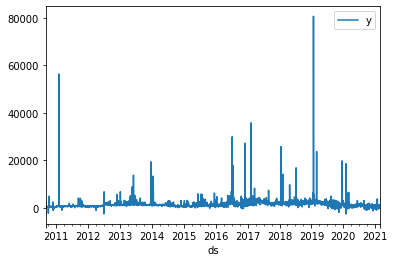

In [11]:
ts.plot()

Resetting index because Prophet requires the 'ds' column to be a separate column, and not as an index

In [43]:
ts = ts.reset_index(level=0)

Splitting dataset into train and test datasets

In [44]:
train_ts = ts[:2757]
test_ts = ts[2757:]

Prophet modelling

In [45]:
m = Prophet()
m.fit(train_ts)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Forecasting

In [46]:
future=m.make_future_dataframe(periods=len(test_ts), freq='1D')
forecast=m.predict(future)

In [18]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2010-09-01,851.777631,-1491.806136,3232.146733,851.777631,851.777631,144.250503,144.250503,144.250503,159.308129,159.308129,159.308129,-15.057627,-15.057627,-15.057627,0.0,0.0,0.0,996.028134
1,2010-09-02,851.727173,-1157.628515,3461.746917,851.727173,851.727173,224.453910,224.453910,224.453910,257.036327,257.036327,257.036327,-32.582418,-32.582418,-32.582418,0.0,0.0,0.0,1076.181083
2,2010-09-03,851.676716,-1385.354199,3453.217764,851.676716,851.676716,-0.584510,-0.584510,-0.584510,50.257478,50.257478,50.257478,-50.841988,-50.841988,-50.841988,0.0,0.0,0.0,851.092206
3,2010-09-04,851.626258,-1933.058964,2884.525949,851.626258,851.626258,-340.872526,-340.872526,-340.872526,-271.372061,-271.372061,-271.372061,-69.500465,-69.500465,-69.500465,0.0,0.0,0.0,510.753732
4,2010-09-05,851.575800,-2052.684690,2989.296754,851.575800,851.575800,-430.884955,-430.884955,-430.884955,-342.634443,-342.634443,-342.634443,-88.250512,-88.250512,-88.250512,0.0,0.0,0.0,420.690845
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3829,2021-02-24,3567.126543,606.363385,6492.799054,1914.598169,5261.631082,-91.262777,-91.262777,-91.262777,159.308129,159.308129,159.308129,-250.570906,-250.570906,-250.570906,0.0,0.0,0.0,3475.863766
3830,2021-02-25,3567.943112,889.025290,6619.636422,1913.921021,5265.710499,-25.199382,-25.199382,-25.199382,257.036327,257.036327,257.036327,-282.235709,-282.235709,-282.235709,0.0,0.0,0.0,3542.743730
3831,2021-02-26,3568.759681,408.270868,6301.662985,1911.450947,5269.149564,-259.098963,-259.098963,-259.098963,50.257478,50.257478,50.257478,-309.356441,-309.356441,-309.356441,0.0,0.0,0.0,3309.660718
3832,2021-02-27,3569.576250,-56.922748,5986.526514,1908.980874,5270.928565,-603.110641,-603.110641,-603.110641,-271.372061,-271.372061,-271.372061,-331.738579,-331.738579,-331.738579,0.0,0.0,0.0,2966.465610


Plotting forecasted values

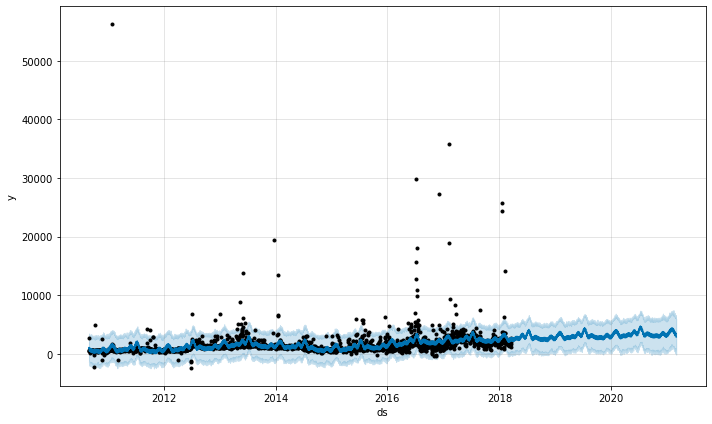

In [45]:
m.plot(forecast, uncertainty=True)
plt.show()

Defining and calculating Mean Absolute Percentage Error

In [21]:
def mape(actual,pred):
    return np.mean(np.abs((actual - pred) / actual)) * 100

MAPE = mape(test_ts.y,forecast.yhat)
MAPE

549.4751413716547

Defining and calculating Root Mean Square Error

In [48]:
def rootmse(real_value,pred_value):
  return np.sqrt(np.mean(np.square(real_value-pred_value)))

RMSE = rootmse(test_ts.y,forecast.yhat)
RMSE

3218.155776512413

Plotting forecast components

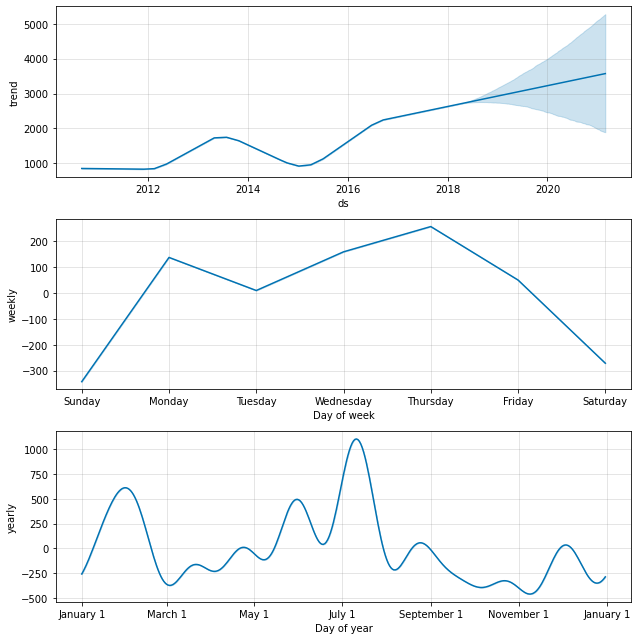

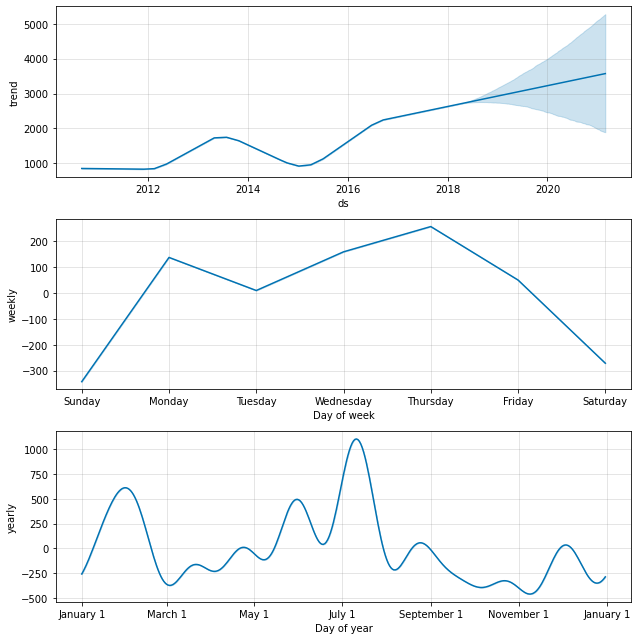

In [54]:
m.plot_components(forecast)

# Multivariate Time Series

Setting 'ds' as index for downsampling

In [17]:
ts1 = df.set_index(df.ds)

Resampling hourly data into daily data

In [19]:
ts1 = ts1.resample('D').sum()

In [22]:
ts1

,ds,add2,add1,add3,y
0,2010-09-01,379.2,41565.38000,88.5600,2751.700
1,2010-09-02,369.6,38898.99000,88.5600,570.810
2,2010-09-03,439.2,41665.76000,106.8000,504.975
3,2010-09-04,328.8,35638.08500,81.3600,502.275
4,2010-09-05,357.6,35611.41000,106.8000,500.555
...,...,...,...,...,...
3829,2021-02-24,537.6,-1525.49745,134.4000,634.770
3830,2021-02-25,518.4,4539.07855,130.5048,577.515
3831,2021-02-26,547.2,9517.02430,130.1808,1445.495
3832,2021-02-27,564.0,4932.88015,130.0800,488.980


Resetting index

In [23]:
ts1=ts1.reset_index(level=0)

Renaming columns for adding regressors

In [21]:
ts1.rename(columns = {'SysLoad':'add1','Tmax':'add2','GasPrice':'add3'}, inplace = True)

Splitting dataset into train and test sets

In [24]:
train = ts1[:2757]
test = ts1[2757:]

In [27]:
train.drop(['index'],axis=1)

,ds,add2,add1,add3,y
0,2010-09-01,379.2,41565.38000,88.5600,2751.700
1,2010-09-02,369.6,38898.99000,88.5600,570.810
2,2010-09-03,439.2,41665.76000,106.8000,504.975
3,2010-09-04,328.8,35638.08500,81.3600,502.275
4,2010-09-05,357.6,35611.41000,106.8000,500.555
...,...,...,...,...,...
2752,2018-03-15,609.6,27139.02585,220.6272,2717.340
2753,2018-03-16,648.0,19710.46400,216.9600,2277.335
2754,2018-03-17,724.8,1079.34705,209.0400,1718.385
2755,2018-03-18,508.8,-4102.43795,203.9880,1088.015


Multivariate Prophet model

In [28]:
m1 = Prophet()
m1.add_regressor('add1')
m1.add_regressor('add2')
m1.add_regressor('add3')
m1.fit(train)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Forecasting with regressors

In [32]:
future1 = m1.make_future_dataframe(periods=len(test), freq='1D')
future1['add1']=ts1['add1']
future1['add2']=ts1['add2']
future1['add3']=ts1['add3']
forecast1=m1.predict(future1)

MAPE

In [39]:
#def mape(actual,pred):
    #return np.mean(np.abs((actual - pred) / actual)) * 100

MAPE = mape(test.y,forecast1.yhat)
MAPE

233.74494702819567

RMSE

In [38]:
#def rootmse(real_value,pred_value):
  #return np.sqrt(np.mean(np.square(real_value-pred_value)))

RMSE = rootmse(test.y, forecast1.yhat)
RMSE

2709.649342166234

Components of the Forecasted model

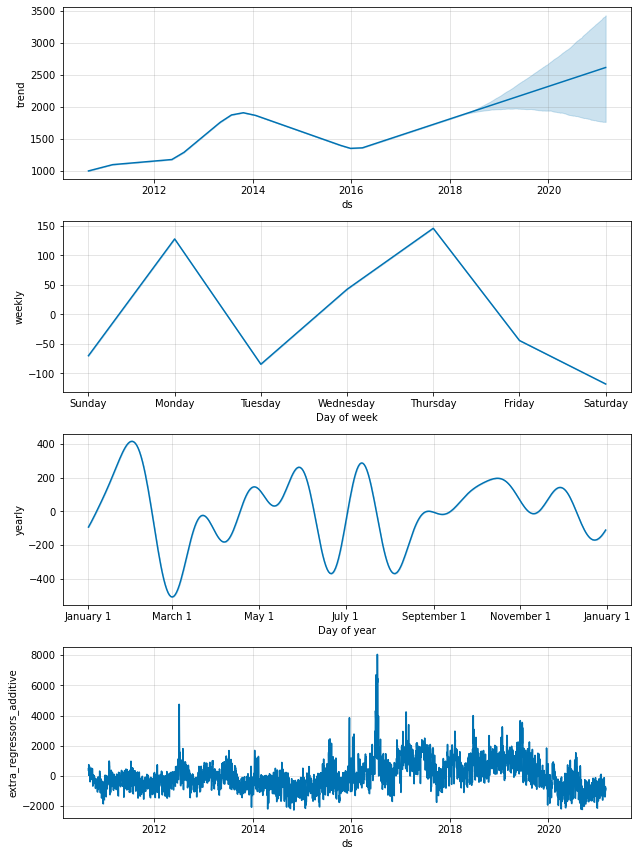

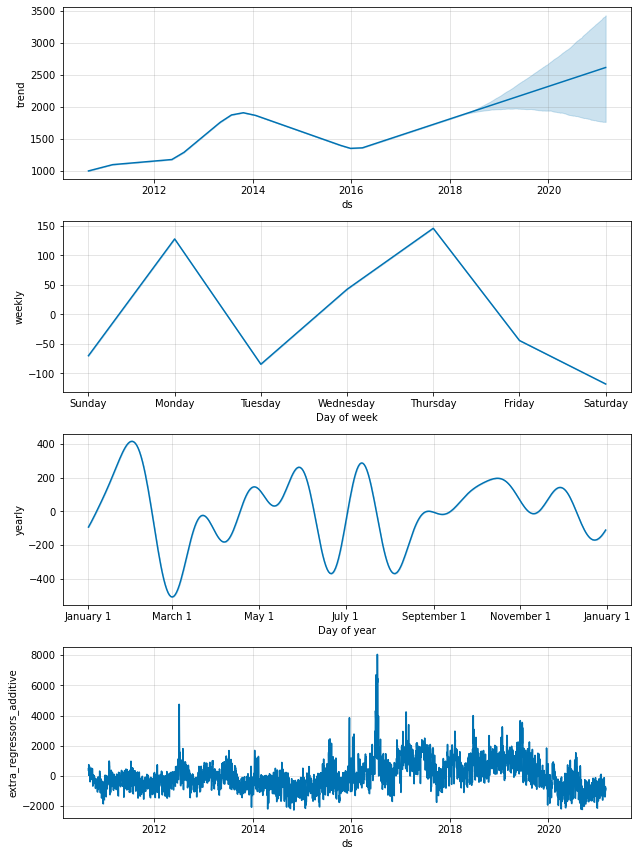

In [49]:
m1.plot_components(forecast1)

Training new dataset without 'Tmax'

In [50]:
new_train = train.drop(['add2'], axis = 1)

Fitting and forecasting new train set

In [51]:
m2 = Prophet()
m2.add_regressor('add1')
#m2.add_regressor('add2')
m2.add_regressor('add3')
m2.fit(new_train)

future2 = m2.make_future_dataframe(periods=len(test), freq='1D')
future2['add1']=ts1['add1']
#future1['add2']=ts1['add2']
future2['add3']=ts1['add3']
forecast2=m2.predict(future2)

#Calculating MAPE
MAPE = mape(test.y,forecast2.yhat) #mape() has already been defined earlier
MAPE

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


236.66321133599143